### Emotion Detection Code

In [1]:
!pip install opencv-python

^C


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import seaborn as sns
import cv2

In [3]:
from sklearn.model_selection import train_test_split
import glob
from tqdm import tqdm
import os
from os import listdir
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [22]:
emotions=["angry","disgust","fear","happy","neutral","sad","surprise"]
all_files=glob.glob(r"C:\Users\Ryona Elza Sabu\Desktop\BE AI - 3rd Year\CV\CV Project\train\*")
print(all_files)

['C:\\Users\\Ryona Elza Sabu\\Desktop\\BE AI - 3rd Year\\CV\\CV Project\\train\\angry', 'C:\\Users\\Ryona Elza Sabu\\Desktop\\BE AI - 3rd Year\\CV\\CV Project\\train\\disgust', 'C:\\Users\\Ryona Elza Sabu\\Desktop\\BE AI - 3rd Year\\CV\\CV Project\\train\\fear', 'C:\\Users\\Ryona Elza Sabu\\Desktop\\BE AI - 3rd Year\\CV\\CV Project\\train\\happy', 'C:\\Users\\Ryona Elza Sabu\\Desktop\\BE AI - 3rd Year\\CV\\CV Project\\train\\neutral', 'C:\\Users\\Ryona Elza Sabu\\Desktop\\BE AI - 3rd Year\\CV\\CV Project\\train\\sad', 'C:\\Users\\Ryona Elza Sabu\\Desktop\\BE AI - 3rd Year\\CV\\CV Project\\train\\surprise']


In [23]:
x=[]
y=[]
i=0
for f in tqdm(all_files) :
    for image in listdir(f) :
        file_path=r""+f+"\\"+image
        img=cv2.imread(file_path,0)
        x.append(img)
        y.append(i)
    i=i+1

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.14it/s]


In [24]:
print(type(x[0]))
x=np.array(x)
y=np.array(y)
print(len(x))
print(len(y))
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(type(y_train))

<class 'numpy.ndarray'>
28709
28709
<class 'numpy.ndarray'>


In [30]:
x_train=x_train.reshape((x_train.shape[0],48,48,1))
x_test=x_test.reshape((x_test.shape[0],48,48,1))
x_train = np.expand_dims(x_train, axis=0)
x_train = np.expand_dims(x_train, axis=-1)
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

In [31]:
datagen=ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                          horizontal_flip=False, vertical_flip=True)

In [32]:
model=model2=model3=Sequential()
model.add(Conv2D(512,input_shape=(48,48,1), kernel_size=(3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(256, kernel_size=(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(7,activation="softmax"))

In [10]:
model2.add(Conv2D(256,input_shape=(48,48,1), kernel_size=(3,3), activation="relu",padding="same"))
model2.add(MaxPooling2D(pool_size=(2,2),padding="same"))#,data_format =  'channels_first'))
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(128, activation="relu"))
model2.add(Dense(64, activation="relu"))
model2.add(Dense(7,activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size=16, epochs=5)

Epoch 1/25
1436/1436 [==============================] - 1480s 1s/step - loss: 1.7348 - accuracy: 0.2956 - val_loss: 1.6228 - val_accuracy: 0.3734
Epoch 2/25
  86/1436 [>.............................] - ETA: 22:39 - loss: 1.6166 - accuracy: 0.3576

In [ ]:
model.save("Emotion_Model2.h5")

In [11]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
earlystop=EarlyStopping(monitor="val_loss", patience=10)
best_weights=ModelCheckpoint("best_weights.h5", save_best_only=True, monitor="val_loss", mode="min")
history2=model2.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size=16, epochs=5,
                   callbacks=[earlystop,best_weights])

Epoch 1/5
1436/1436 [==============================] - ETA: 0s - loss: 1.6764 - accuracy: 0.3318

C:\Users\Ryona Elza Sabu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1436/1436 [==============================] - 518s 360ms/step - loss: 1.6764 - accuracy: 0.3318 - val_loss: 1.5534 - val_accuracy: 0.3945
Epoch 2/5
1436/1436 [==============================] - 538s 375ms/step - loss: 1.4849 - accuracy: 0.4260 - val_loss: 1.4439 - val_accuracy: 0.4377
Epoch 3/5
1436/1436 [==============================] - 559s 389ms/step - loss: 1.3700 - accuracy: 0.4769 - val_loss: 1.4256 - val_accuracy: 0.4425
Epoch 4/5
1436/1436 [==============================] - 547s 381ms/step - loss: 1.2702 - accuracy: 0.5158 - val_loss: 1.4190 - val_accuracy: 0.4695
Epoch 5/5
1436/1436 [==============================] - 517s 360ms/step - loss: 1.1747 - accuracy: 0.5552 - val_loss: 1.4587 - val_accuracy: 0.4652


In [12]:
model2.save("Emotion_Model3.h5")

In [ ]:
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Testing")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

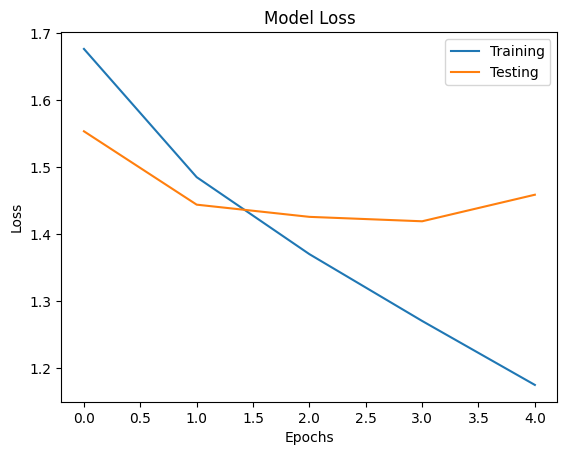

In [13]:
plt.plot(history2.history["loss"], label="Training")
plt.plot(history2.history["val_loss"], label="Testing")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [4]:
img=cv2.imread(r"C:\Users\Ryona Elza Sabu\Desktop\BE AI - 3rd Year\CV\CV Project\test\angry\PrivateTest_731447.jpg",0)
cv2.imshow("Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
img=cv2.resize(img, (48,48))
loaded_model=keras.models.load_model("Emotion_Model2.h5")
emotions=["Angry","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
print(img.shape)
img=np.array(img)
img=img.reshape((48,48,1))
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)
img=img.astype("float32")/255.0
prob1=loaded_model.predict(img)
#prob2=model2.predict(img)
ind=np.argmax(prob1)
#ind2=np.argmax(prob2)
print("The emotion displayed is ",emotions[ind])
#print("The emotion displayed is ",emotions[ind2])

(48, 48)
1/1 [==============================] - 0s 289ms/step
The emotion displayed is  Angry


In [4]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 512)       5120      
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 512)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 512)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       1179904   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 256)       0